# Nutritional Analysis of McDonald's Menu Items  
### Data Analysis and Visualization Report  
**Author**: Vraj Dave    


To start, we load the required libraries and read the dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [34]:
# Load the dataset
df = pd.read_csv("Nutrical Dataset.csv")

In [35]:
# Display the first few rows
print("Data Preview:")
print(df.head())

Data Preview:
    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \

In [10]:
# Basic dataset information
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                      

In [11]:
# Check for missing values
print("\nMissing Values Summary:")
print(df.isnull().sum())


Missing Values Summary:
Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


2. Data Preprocessing
Ensure the dataset is clean for analysis.

In [12]:
# Drop rows with missing values
df_cleaned = df.dropna()

In [13]:
# Verify missing values are handled
print("\nMissing Values After Cleaning:")
print(df_cleaned.isnull().sum())


Missing Values After Cleaning:
Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


In [14]:
# Display summary statistics
print("\nStatistical Summary:")
print(df_cleaned.describe())


Statistical Summary:
          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.321

In [15]:
# Rename columns if necessary for consistency
df_cleaned.columns = [col.strip().lower().replace(" ", "_") for col in df_cleaned.columns]

print("\nRenamed Columns:")
print(df_cleaned.columns)


Renamed Columns:
Index(['category', 'item', 'serving_size', 'calories', 'calories_from_fat',
       'total_fat', 'total_fat_(%_daily_value)', 'saturated_fat',
       'saturated_fat_(%_daily_value)', 'trans_fat', 'cholesterol',
       'cholesterol_(%_daily_value)', 'sodium', 'sodium_(%_daily_value)',
       'carbohydrates', 'carbohydrates_(%_daily_value)', 'dietary_fiber',
       'dietary_fiber_(%_daily_value)', 'sugars', 'protein',
       'vitamin_a_(%_daily_value)', 'vitamin_c_(%_daily_value)',
       'calcium_(%_daily_value)', 'iron_(%_daily_value)'],
      dtype='object')


# Exploratory Data Analysis (EDA)
### Analyze calorie distribution, nutritional components (fat, protein, carbohydrates), and patterns.

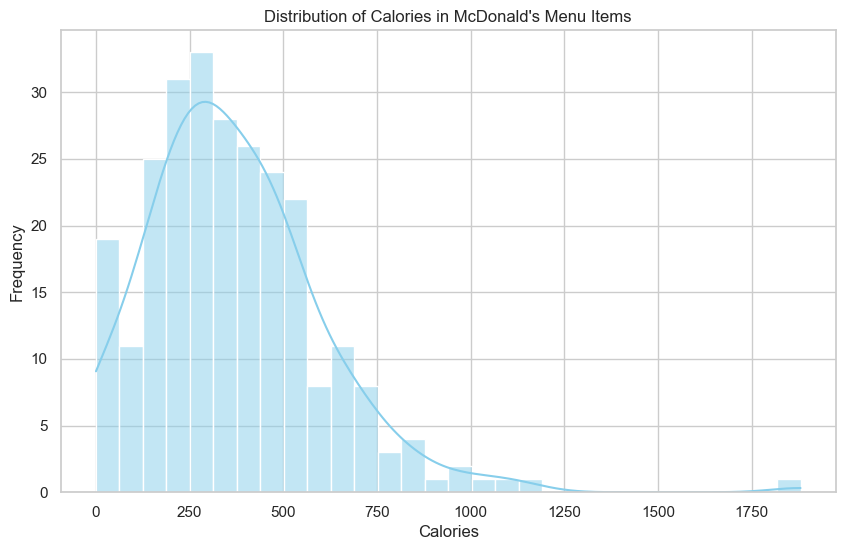

In [16]:
# Plot the calorie distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['calories'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Calories in McDonald's Menu Items")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()


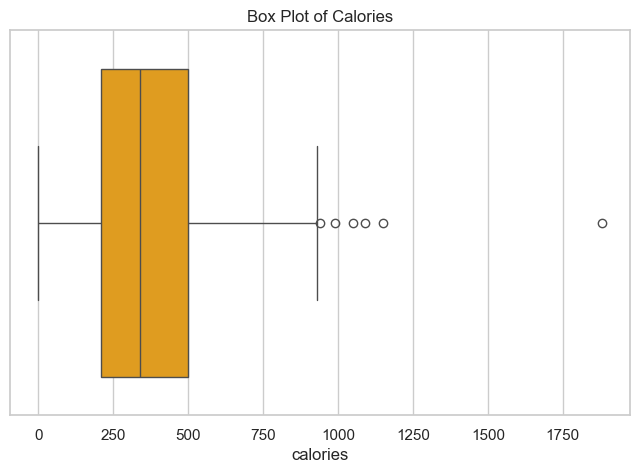

In [17]:
# Boxplot to identify outliers in calories
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['calories'], color='orange')
plt.title("Box Plot of Calories")
plt.show()


C:\Users\vrajd\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\vrajd\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\vrajd\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\vrajd\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\vrajd\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

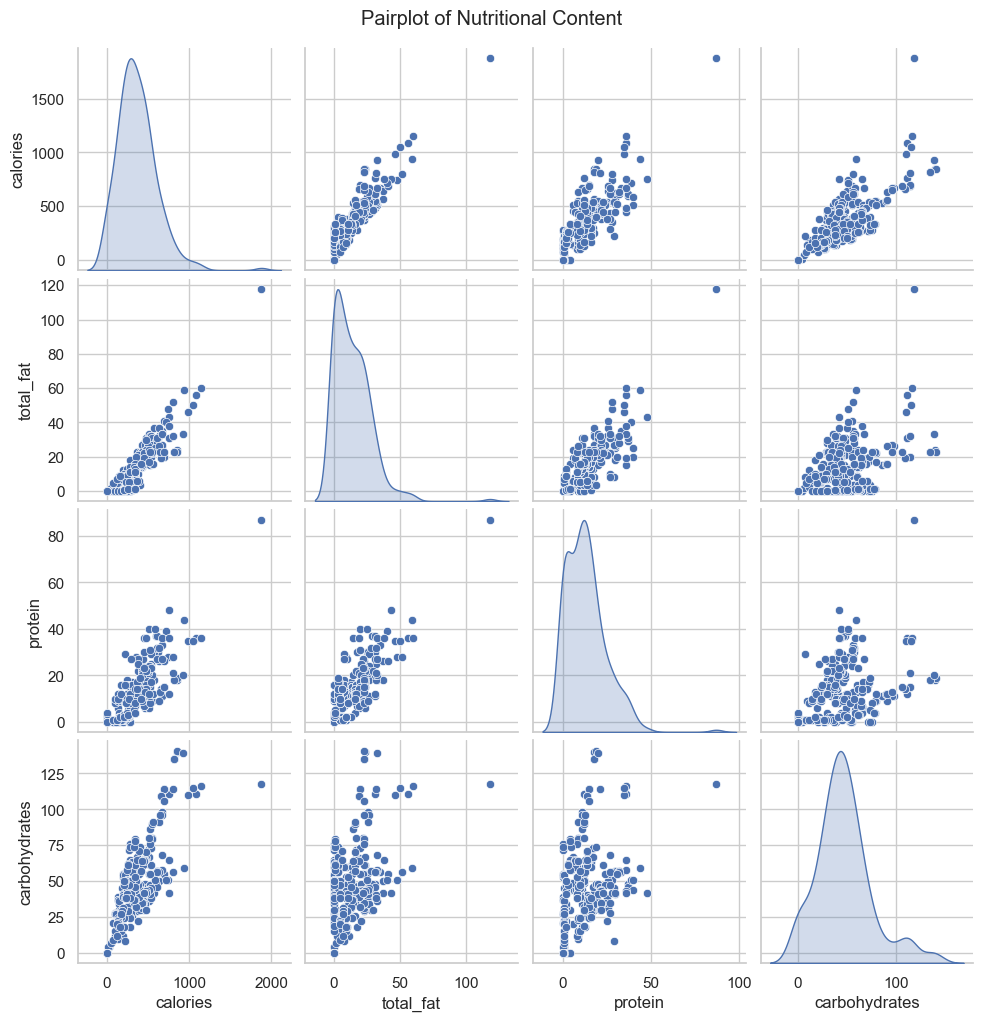

In [18]:
# Pairplot to compare macronutrients (calories, fat, protein, carbs)
selected_cols = ['calories', 'total_fat', 'protein', 'carbohydrates']
sns.pairplot(df_cleaned[selected_cols], diag_kind='kde', palette='muted')
plt.suptitle("Pairplot of Nutritional Content", y=1.02)
plt.show()


Average Nutritional Content by Category:
                      calories  total_fat    protein  carbohydrates
category                                                           
Beef & Pork         494.000000  24.866667  27.333333      40.133333
Beverages           113.703704   0.092593   1.333333      28.814815
Breakfast           526.666667  27.690476  19.857143      49.761905
Chicken & Fish      552.962963  26.962963  29.111111      49.074074
Coffee & Tea        283.894737   8.021053   8.863158      44.526316
Desserts            222.142857   7.357143   4.000000      34.857143
Salads              270.000000  11.750000  19.833333      21.666667
Smoothies & Shakes  531.428571  14.125000  10.857143      90.428571
Snacks & Sides      245.769231  10.538462   8.384615      29.153846


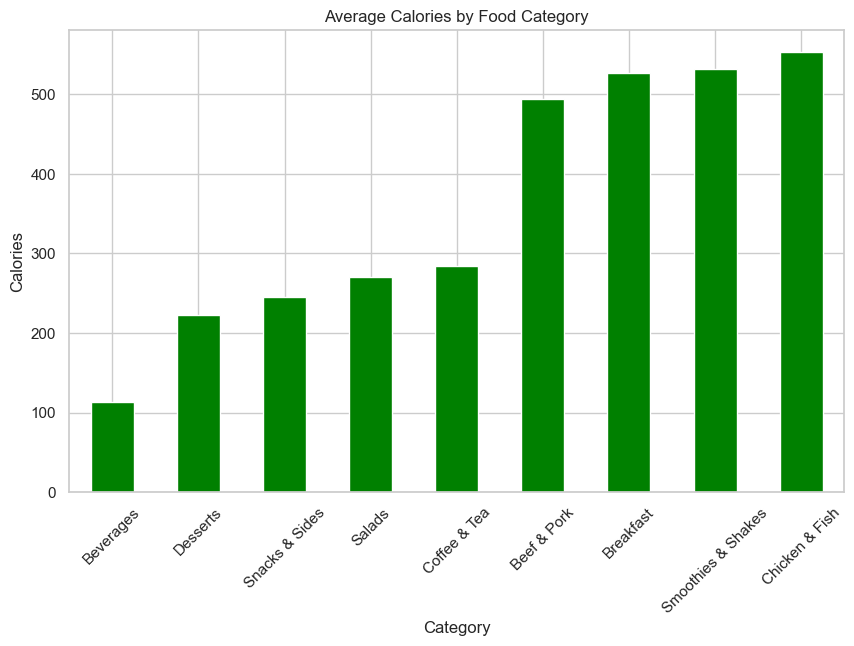

In [19]:
# Group by category and calculate average nutritional content
if 'category' in df_cleaned.columns:
    category_stats = df_cleaned.groupby('category')[['calories', 'total_fat', 'protein', 'carbohydrates']].mean()
    print("\nAverage Nutritional Content by Category:")
    print(category_stats)

    # Bar plot to compare average calories per category
    plt.figure(figsize=(10, 6))
    category_stats['calories'].sort_values().plot(kind='bar', color='green')
    plt.title("Average Calories by Food Category")
    plt.ylabel("Calories")
    plt.xlabel("Category")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Category column not found in the dataset.")



Top 5 High-Calorie Items:
                                                 item  calories
82                       Chicken McNuggets (40 piece)      1880
32        Big Breakfast with Hotcakes (Large Biscuit)      1150
31      Big Breakfast with Hotcakes (Regular Biscuit)      1090
34  Big Breakfast with Hotcakes and Egg Whites (La...      1050
33  Big Breakfast with Hotcakes and Egg Whites (Re...       990

Top 5 Low-Calorie Items:
                       item  calories
114       Diet Coke (Small)         0
115      Diet Coke (Medium)         0
116       Diet Coke (Large)         0
117       Diet Coke (Child)         0
122  Diet Dr Pepper (Small)         0


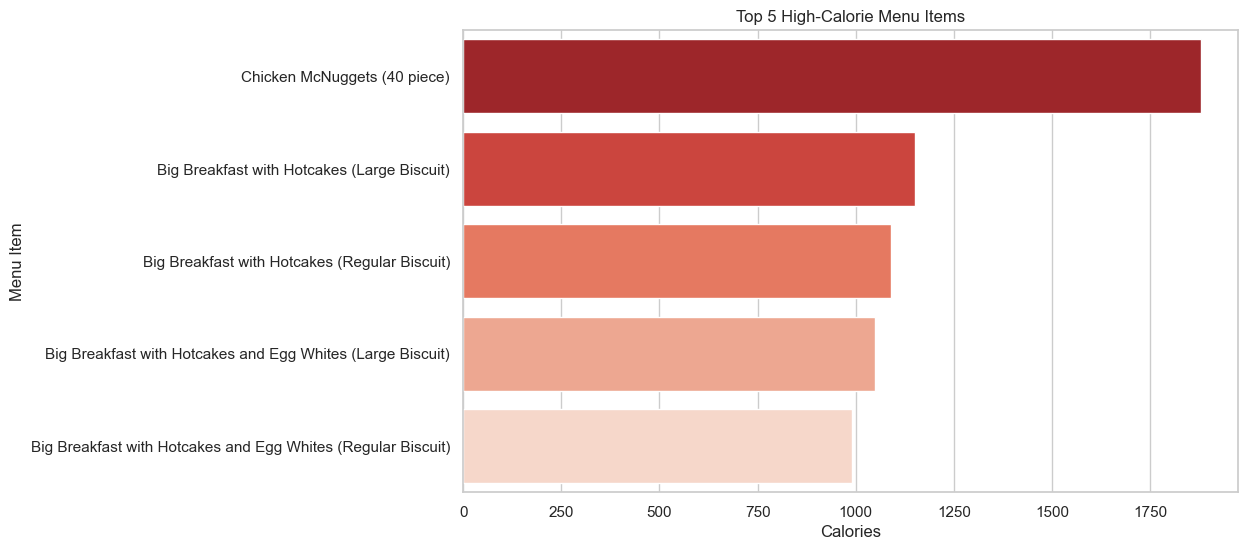


Top 5 Low-Calorie Items:
                       item  calories
114       Diet Coke (Small)         0
115      Diet Coke (Medium)         0
116       Diet Coke (Large)         0
117       Diet Coke (Child)         0
122  Diet Dr Pepper (Small)         0


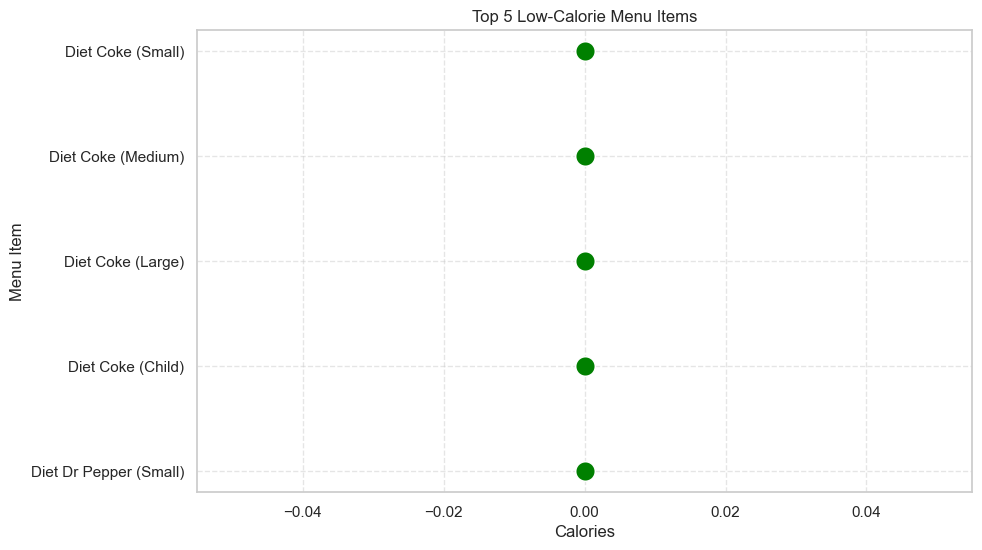

In [22]:
# Top 5 items with highest calories
highest_calories = df_cleaned.nlargest(5, 'calories')
print("\nTop 5 High-Calorie Items:")
print(highest_calories[['item', 'calories']])

# Top 5 items with lowest calories
lowest_calories = df_cleaned.nsmallest(5, 'calories')
print("\nTop 5 Low-Calorie Items:")
print(lowest_calories[['item', 'calories']])

# Plot highest calorie items
plt.figure(figsize=(10, 6))
sns.barplot(x='calories', y='item', hue='item', data=highest_calories, palette='Reds_r', legend=False)
plt.title("Top 5 High-Calorie Menu Items")
plt.xlabel("Calories")
plt.ylabel("Menu Item")
plt.show()

# Top 5 items with lowest calories
lowest_calories = df_cleaned.nsmallest(5, 'calories')
print("\nTop 5 Low-Calorie Items:")
print(lowest_calories[['item', 'calories']])

# Dot plot for lowest calorie items
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='item', data=lowest_calories, color='green', s=200, marker='o')

plt.title("Top 5 Low-Calorie Menu Items")
plt.xlabel("Calories")
plt.ylabel("Menu Item")
plt.grid(True, linestyle='--', alpha=0.5)  # Add a light grid for better visibility
plt.show()


C:\Users\vrajd\AppData\Local\Temp\ipykernel_15468\4285863095.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='calories', data=df_cleaned, palette='coolwarm')


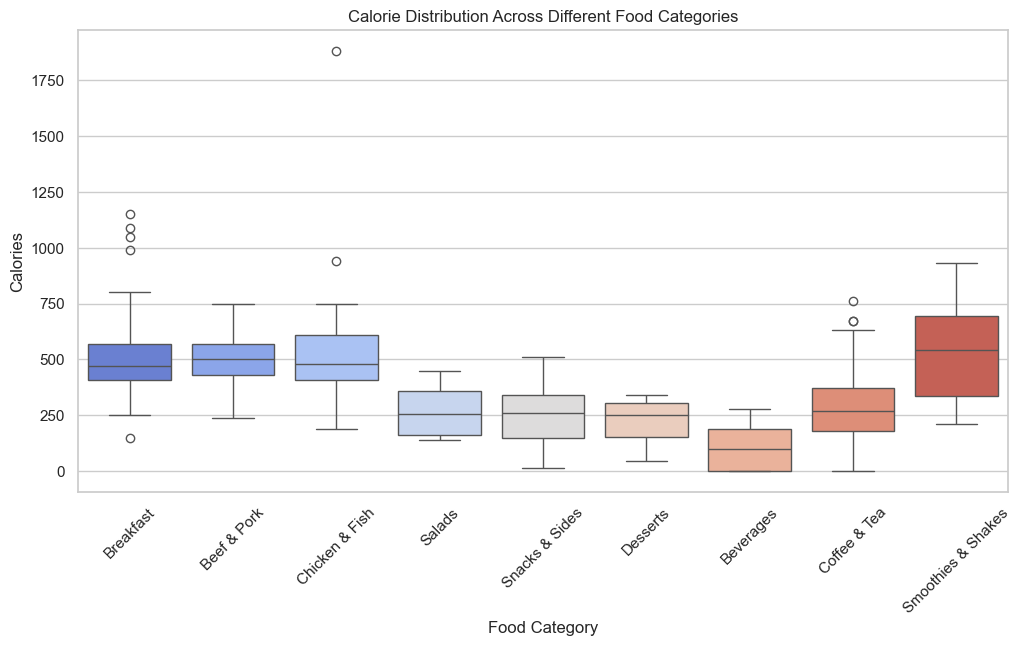

In [23]:
# Check if 'category' exists in the dataset
if 'category' in df_cleaned.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='category', y='calories', data=df_cleaned, palette='coolwarm')
    plt.title("Calorie Distribution Across Different Food Categories")
    plt.xlabel("Food Category")
    plt.ylabel("Calories")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("The column 'category' does not exist in the dataset.")


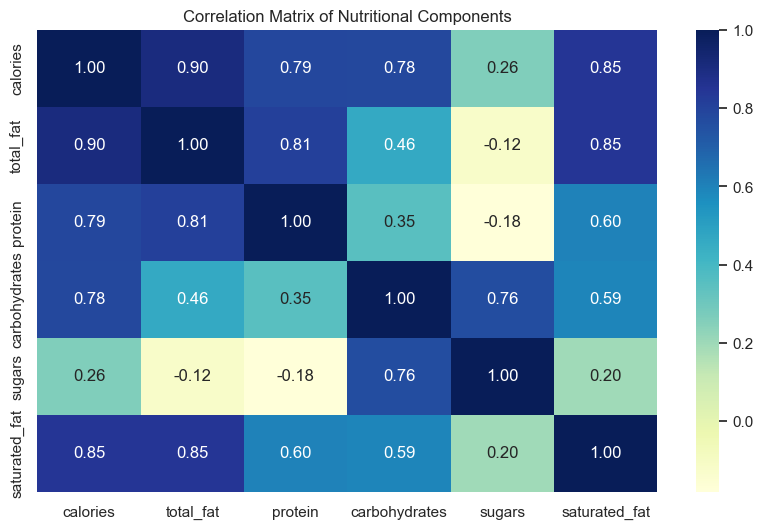

In [24]:
# Select relevant numerical columns for correlation
nutritional_columns = ['calories', 'total_fat', 'protein', 'carbohydrates', 'sugars', 'saturated_fat']

# Check if all columns exist in the dataset
nutritional_columns = [col for col in nutritional_columns if col in df_cleaned.columns]

# Compute the correlation matrix
correlation_matrix = df_cleaned[nutritional_columns].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Matrix of Nutritional Components")
plt.show()


C:\Users\vrajd\AppData\Local\Temp\ipykernel_15468\1135039467.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='protein_calorie_ratio', y='item', data=top_protein_ratio, palette='Blues_d')


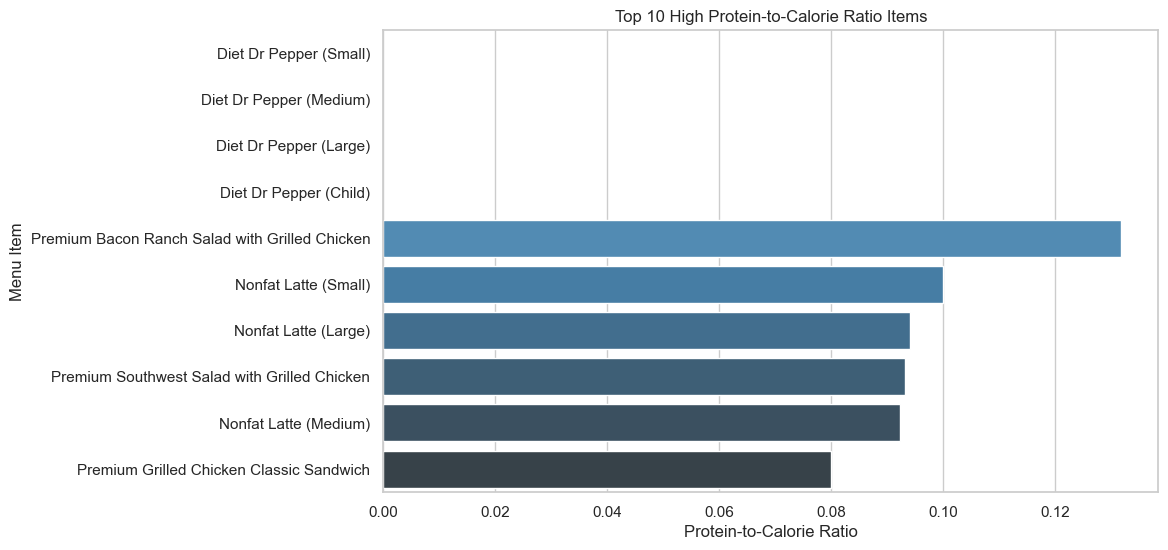

In [28]:
# Add a new column for protein-to-calorie ratio
df_cleaned['protein_calorie_ratio'] = df_cleaned['protein'] / df_cleaned['calories']

# Top 10 items with highest protein-to-calorie ratio
top_protein_ratio = df_cleaned.nlargest(10, 'protein_calorie_ratio')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='protein_calorie_ratio', y='item', data=top_protein_ratio, palette='Blues_d')
plt.title("Top 10 High Protein-to-Calorie Ratio Items")
plt.xlabel("Protein-to-Calorie Ratio")
plt.ylabel("Menu Item")
plt.show()


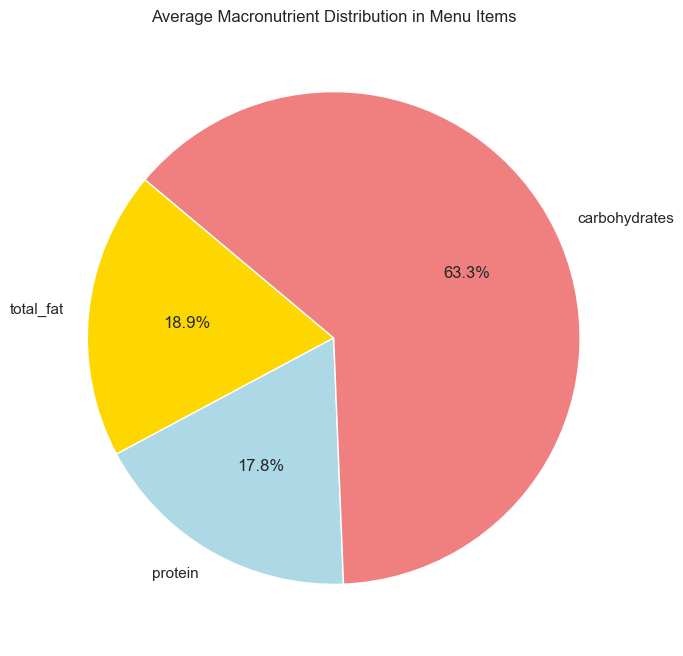

In [29]:
# Calculate average values for fat, protein, and carbs
macronutrients = df_cleaned[['total_fat', 'protein', 'carbohydrates']].mean()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(macronutrients, labels=macronutrients.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue', 'lightcoral'])
plt.title("Average Macronutrient Distribution in Menu Items")
plt.show()


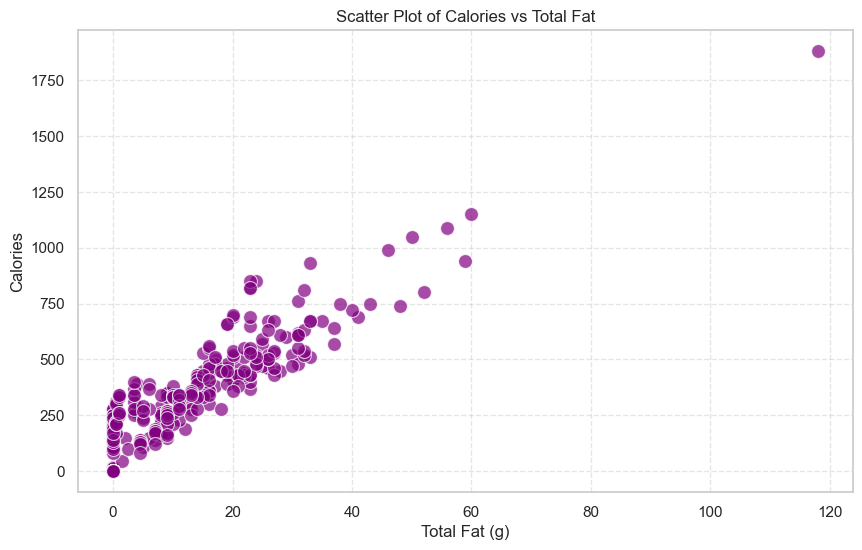

In [30]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_fat', y='calories', data=df_cleaned, color='purple', s=100, alpha=0.7)
plt.title("Scatter Plot of Calories vs Total Fat")
plt.xlabel("Total Fat (g)")
plt.ylabel("Calories")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


C:\Users\vrajd\AppData\Local\Temp\ipykernel_15468\3027878221.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


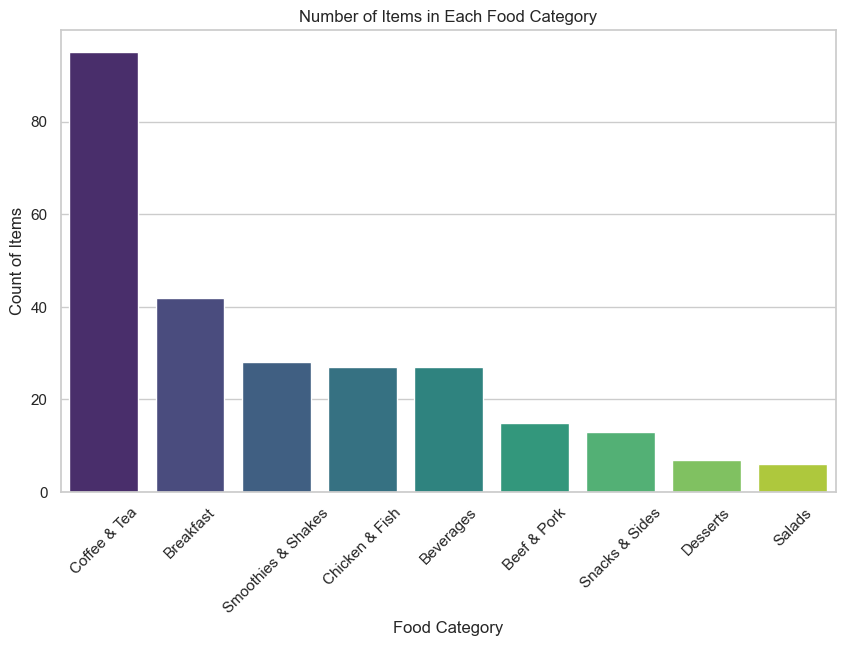

In [31]:
# Check if 'category' exists
if 'category' in df_cleaned.columns:
    # Count the number of items per category
    category_counts = df_cleaned['category'].value_counts()

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
    plt.title("Number of Items in Each Food Category")
    plt.xlabel("Food Category")
    plt.ylabel("Count of Items")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("The column 'category' does not exist in the dataset.")


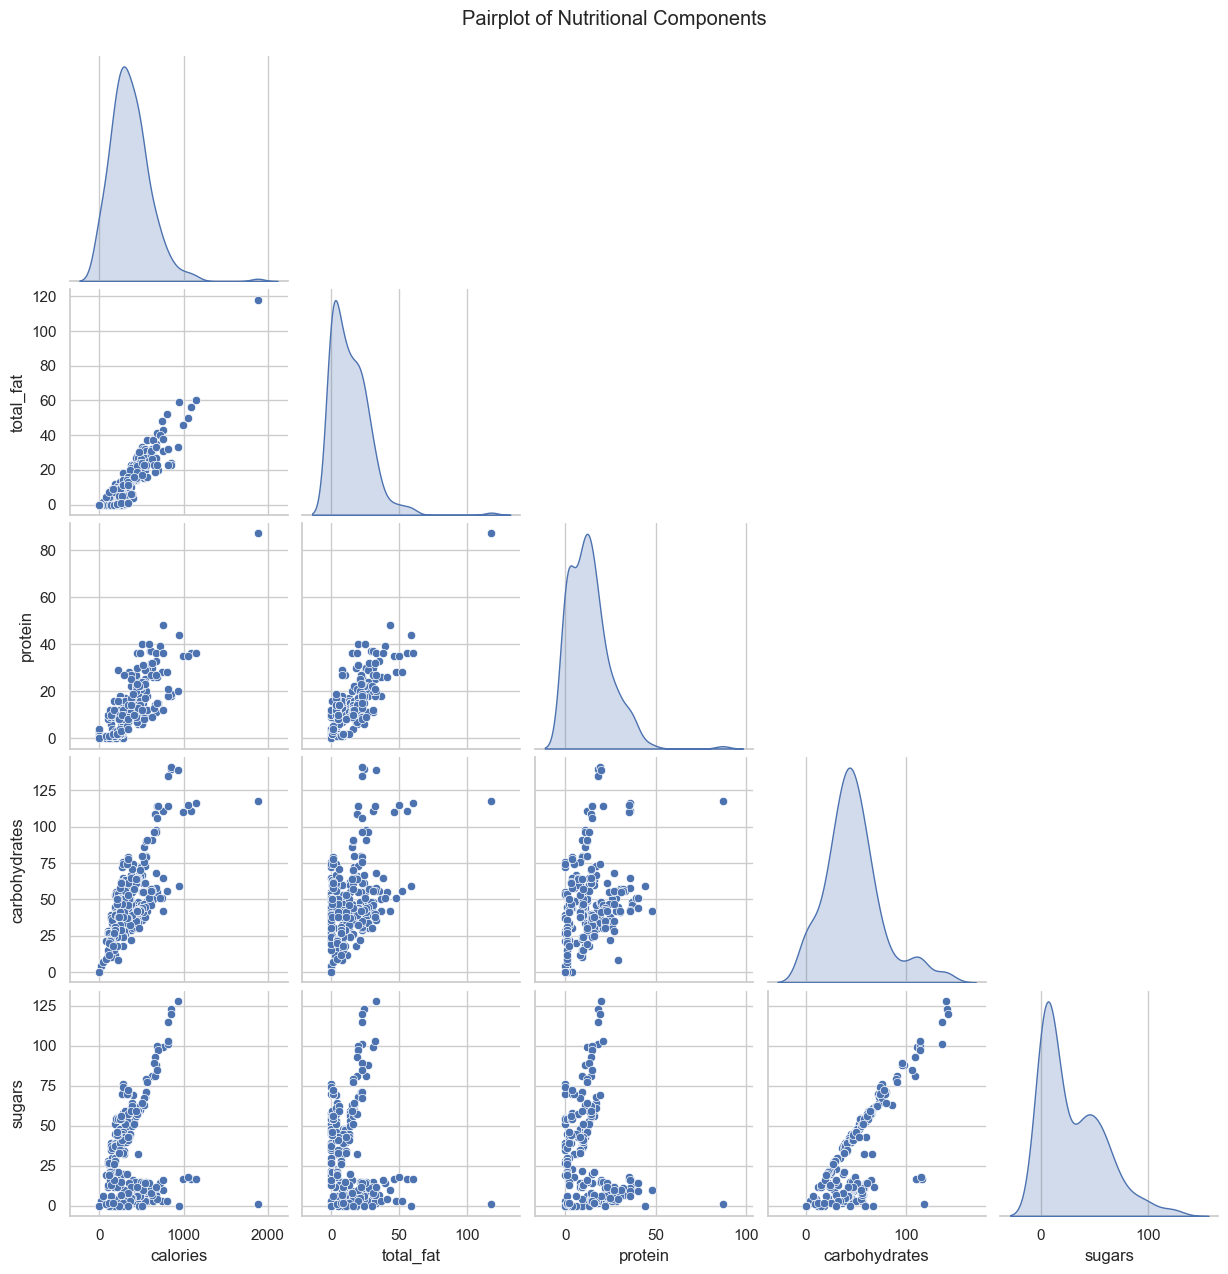

In [32]:
# Pairplot for selected macronutrients
nutritional_cols = ['calories', 'total_fat', 'protein', 'carbohydrates', 'sugars']

# Filter for existing columns
nutritional_cols = [col for col in nutritional_cols if col in df_cleaned.columns]

# Pairplot
sns.pairplot(df_cleaned[nutritional_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Nutritional Components", y=1.02)
plt.show()


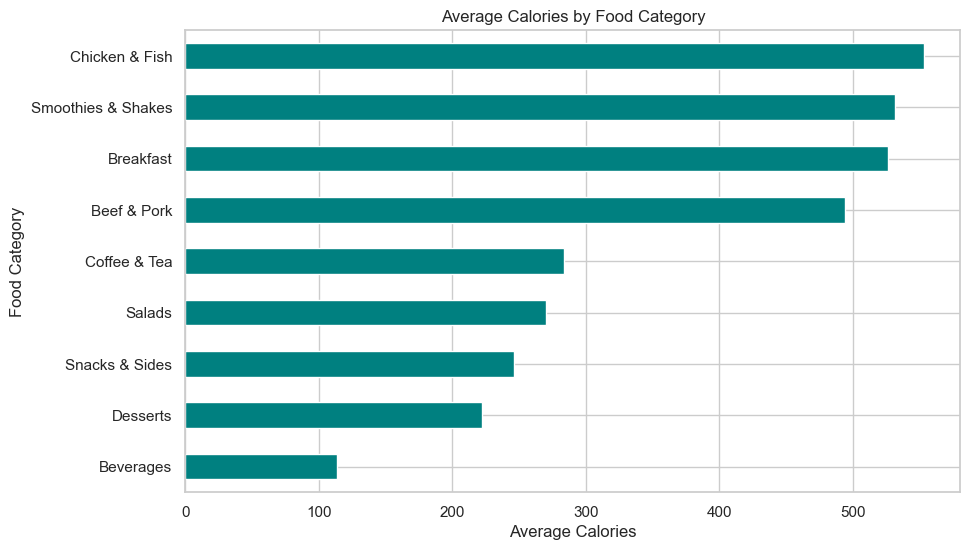

In [33]:
if 'category' in df_cleaned.columns:
    # Calculate average calories per category
    avg_calories_by_category = df_cleaned.groupby('category')['calories'].mean().sort_values()

    # Horizontal bar chart
    plt.figure(figsize=(10, 6))
    avg_calories_by_category.plot(kind='barh', color='teal')
    plt.title("Average Calories by Food Category")
    plt.xlabel("Average Calories")
    plt.ylabel("Food Category")
    plt.show()
else:
    print("The column 'category' does not exist in the dataset.")


# Recommendations for McDonald's  

1. **Increase Protein-Rich Options**:  
   - Offer more high-protein, low-calorie items like grilled chicken, salads, and plant-based proteins.  

2. **Reduce Saturated Fat**:  
   - Reformulate recipes to use healthier oils or reduce fatty components.  

3. **Low-Calorie Alternatives**:  
   - Introduce smaller portion sizes or low-calorie versions of popular items.  

4. **Transparency and Education**:  
   - Clearly display nutritional information to help customers make informed choices.  
